The Final optimal value of x is: 6.99999884509287
The Final optimal value of y is: -9.99999721180754
The Optimal Value of Function at the final point: -30.9999999999984


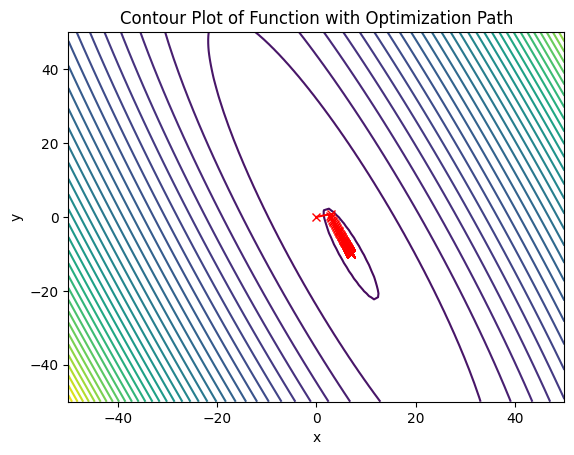

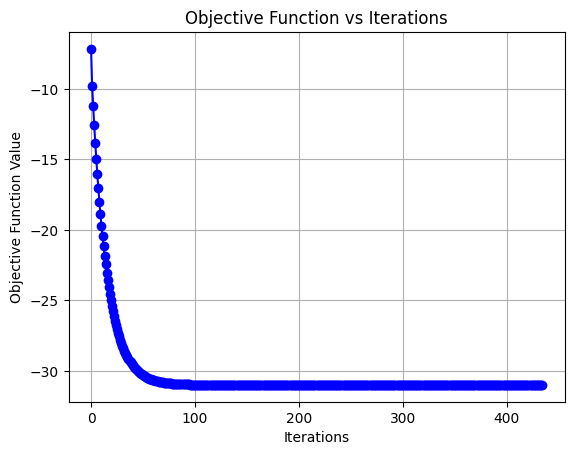

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, diff, Matrix

x, y = symbols('x y')

#Function
g = 5*x**2 - 30*x + y**2 - 8*y + 4*x*y + 34

#Everytime it would not converge at 0 so I have taken a Tolerance
tolerance = 1e-6

#First Point
xnew = 0
ynew = 0

points_x = [xnew]
points_y = [ynew]
objective_values = []  #Stroing the function values at each Iteration

while True:
    # Finding the Gradient
    x1_val = diff(g, x)
    #x2_val = diff(x1_val, x)
    y1_val = diff(g, y)
    #y2_val = diff(y1_val, y)
    #xy1_val = diff(x1_val, y)
    #yx1_val = diff(y1_val, x)


 # Values of Gradient at every point

    x1 = x1_val.subs({x: xnew, y: ynew}).evalf()
    #x2 = x2_val.subs({x: xnew, y: ynew}).evalf()
    y1 = y1_val.subs({x: xnew, y: ynew}).evalf()
    #y2 = y2_val.subs({x: xnew, y: ynew}).evalf()
    #xy1 = xy1_val.subs({x: xnew, y: ynew}).evalf()
    #yx1 = yx1_val.subs({x: xnew, y: ynew}).evalf()

    x_val = xnew
    y_val = ynew

    # Create a 2x2 matrix -H
    #H = Matrix([[x2, xy1], [yx1, y2]]) #To keep the learning rate(lambda)variable with each iteration

    # Creating a 1x2 Matrix S
    S = Matrix([[x1], [y1]])
    #St=S.transpose()

    #lambda1 = St @ S / (St @ H @ S)

    lambda1 = 0.1
    xnew = x_val - lambda1*np.array(S)[0][0]
    ynew = y_val - lambda1*np.array(S)[1][0]

    points_x.append(xnew)
    points_y.append(ynew)

    # Evaluate g at the current values and store it
    current_g_value = g.subs({x: xnew, y: ynew}).evalf()
    objective_values.append(current_g_value)

#breaking condition
    if abs(x1) < tolerance and abs(y1) < tolerance:

        print(f'The Final optimal value of x is: {xnew}')
        print(f'The Final optimal value of y is: {ynew}')

        final_g_value = g.subs({x: xnew, y: ynew}).evalf()
        print(f'The Optimal Value of Function at the final point: {final_g_value}')

        break

# creating a meshgrid for the contour plot
x_vals = np.linspace(-50, 50, 100)
y_vals = np.linspace(-50, 50, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculating the function values on the grid
Z = 5*X**2 - 30*X + Y**2 - 8*Y + 4*X*Y + 34

# Contour plot
plt.contour(X, Y, Z, levels=50, cmap='viridis')

# ploting the points on the contour plot
plt.plot(points_x, points_y, color='red', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of Function with Optimization Path')
plt.show()

# Objective function versus iterations Plot
plt.plot(objective_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Objective Function vs Iterations')
plt.grid(True)
plt.show()
